# Exploración del dataset Chickenpox

En este notebook se realizará la exploración del dataset **Chickenpox** de **PyTorch Geometric Temporal**.

---
## Estrcutura del dataset
1. **Nodos:** Distritos de Hungría.
2. **Aristas:** Proximidad geográfica de los distritos.
3. **Tiempo:** Cada snapshot es una 1 semana de datos.

---

In [1]:
!pip install torch-geometric-temporal > /dev/null && echo "DONE!"

DONE!


Importamos el dataset de la libreria **PyTorch Geometric Temporal**

In [2]:
# Importamos el dataset Chickenpox de PyTorch
from torch_geometric_temporal.dataset import ChickenpoxDatasetLoader

# Realizamos carga del mismo
loader = ChickenpoxDatasetLoader()
dataset = loader.get_dataset(lags=1)
snapshot = dataset[0]

# Imprimimos 
print("Número de nodos:", snapshot.x.shape[0])  
print("Número de snapshots:", len(dataset.targets))
print("Número de aristas:", snapshot.edge_index.shape[1]) 
print("Features (lags):", snapshot.x.shape[1])  
print("Target shape:", snapshot.y.shape) 

# Primer valor del dataset
primer_valor = snapshot.x[0][0].item()

print("Primer valor del snapshot 1:", primer_valor)

Número de nodos: 20
Número de snapshots: 520
Número de aristas: 102
Features (lags): 1
Target shape: torch.Size([20])
Primer valor del snapshot 1: -0.0010813572444021702


---

## Dataset Chickenpox

Para el estudio del dataset haremos uso del siguiente dataset [Chickenpox](https://archive.ics.uci.edu/dataset/580/hungarian+chickenpox+cases) con los datos limpios (sin normalizar),

In [3]:
import pandas as pd
import geopandas as gpd

#Importamos el dataset limpio
dataframe = pd.read_csv("/kaggle/input/hungarian-chickenpox-cases/hungary_chickenpox.csv")

# Imprimimos una descripción general de este dataset
dataframe.describe()

,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,HEVES,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,101.245211,34.204981,37.166667,28.911877,57.082375,31.488506,33.272031,41.436782,47.097701,29.691571,40.869732,25.643678,21.850575,86.101533,27.609195,29.854406,20.352490,22.467433,40.636015,19.873563
std,76.354872,32.567222,36.843095,37.618092,50.725437,33.790208,31.397989,36.014297,44.610836,31.857750,37.283299,24.467995,22.025999,66.773741,26.724236,31.814630,23.273025,25.006638,40.699471,21.999636
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.250000,8.000000,8.000000,4.000000,14.250000,6.000000,7.000000,9.000000,11.000000,6.250000,10.000000,6.000000,4.000000,28.250000,6.000000,6.000000,4.000000,3.000000,7.250000,4.000000
50%,93.000000,25.000000,29.500000,14.000000,46.500000,20.500000,24.000000,35.000000,37.000000,21.000000,31.000000,19.000000,15.000000,81.000000,20.500000,18.500000,12.000000,13.000000,32.000000,13.000000
75%,149.000000,51.000000,53.000000,38.750000,83.750000,47.000000,51.750000,63.000000,68.000000,41.000000,61.750000,39.000000,32.750000,129.750000,41.000000,45.000000,29.000000,34.000000,59.000000,31.000000
max,479.000000,194.000000,274.000000,271.000000,355.000000,199.000000,164.000000,181.000000,262.000000,210.000000,224.000000,160.000000,112.000000,431.000000,155.000000,203.000000,131.000000,141.000000,230.000000,216.000000


In [4]:
# Imprimimos sus columnas
print(dataframe.columns)

Index(['Date', 'BUDAPEST', 'BARANYA', 'BACS', 'BEKES', 'BORSOD', 'CSONGRAD',
       'FEJER', 'GYOR', 'HAJDU', 'HEVES', 'JASZ', 'KOMAROM', 'NOGRAD', 'PEST',
       'SOMOGY', 'SZABOLCS', 'TOLNA', 'VAS', 'VESZPREM', 'ZALA'],
      dtype='object')


In [5]:
# Observamos los primeros datos
dataframe.head()

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60


---

### Organización del dataframe

1. Tenemos que transponer la tabla, para tener los **distritos** como filas, y las **semanas** como columnas.

In [6]:
# Transponemos la tabla
dataframe=dataframe.set_index("Date")
dataframe_t = dataframe.transpose()
dataframe_t.head()

Date,03/01/2005,10/01/2005,17/01/2005,24/01/2005,31/01/2005,07/02/2005,14/02/2005,21/02/2005,28/02/2005,07/03/2005,...,27/10/2014,03/11/2014,10/11/2014,17/11/2014,24/11/2014,01/12/2014,08/12/2014,15/12/2014,22/12/2014,29/12/2014
BUDAPEST,168,157,96,163,122,174,153,115,119,114,...,28,44,33,85,16,95,43,35,30,259
BARANYA,79,60,44,49,78,76,103,74,86,81,...,7,4,5,15,15,12,39,7,23,42
BACS,30,30,31,43,53,77,54,64,57,129,...,1,7,10,26,14,41,31,15,8,49
BEKES,173,92,86,126,87,152,192,174,171,217,...,2,0,0,7,2,6,10,0,0,32
BORSOD,169,200,93,46,103,189,148,140,90,167,...,13,16,29,14,3,39,34,0,11,38


2. Renombramos las columnas que se encuentran como fecha, las pasamos a "week_1".

In [7]:
columnas_actuales = dataframe_t.columns
num_semanas = range(1, len(columnas_actuales)+1)
# Reemplazamos los nombres de columnas
dataframe_t.columns = [f"week_{i}" for i in range(1, len(dataframe_t.columns)+1)]
dataframe_t.head()

,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,...,week_513,week_514,week_515,week_516,week_517,week_518,week_519,week_520,week_521,week_522
BUDAPEST,168,157,96,163,122,174,153,115,119,114,...,28,44,33,85,16,95,43,35,30,259
BARANYA,79,60,44,49,78,76,103,74,86,81,...,7,4,5,15,15,12,39,7,23,42
BACS,30,30,31,43,53,77,54,64,57,129,...,1,7,10,26,14,41,31,15,8,49
BEKES,173,92,86,126,87,152,192,174,171,217,...,2,0,0,7,2,6,10,0,0,32
BORSOD,169,200,93,46,103,189,148,140,90,167,...,13,16,29,14,3,39,34,0,11,38


---

## 1. Visualización espacial
Para realizar la visualización espacial requerimos transponer la tabla, para posterior emparejar con el [dataset geográfico de Hungría](https://gadm.org/download_country.html).

Observamos que los **indixes** de los dataframe son diferentes, por lo tanto debemos de ajustarlos para así que el merge sea exitoso.

In [8]:
# Tenemos aquí dos datasets.
# El primero es el datset de los distritos de Hungría con información geográfica.
gdf = gpd.read_file("/kaggle/input/distrito-hungria/gadm41_HUN_1.json")
# El segundo es un datset simple, con el id y nombre de los distritos usados en Chickenpox
id_name_district = pd.read_csv("/kaggle/input/name-district/id_name_district.csv")


print("Dataframe Chickenpox: ",dataframe_t.index)
print("Dataset GADM:",gdf["NAME_1"].unique())

Dataframe Chickenpox:  Index(['BUDAPEST', 'BARANYA', 'BACS', 'BEKES', 'BORSOD', 'CSONGRAD', 'FEJER',
       'GYOR', 'HAJDU', 'HEVES', 'JASZ', 'KOMAROM', 'NOGRAD', 'PEST', 'SOMOGY',
       'SZABOLCS', 'TOLNA', 'VAS', 'VESZPREM', 'ZALA'],
      dtype='object')
Dataset GADM: ['Bács-Kiskun' 'Baranya' 'Békés' 'Borsod-Abaúj-Zemplén' 'Budapest'
 'Csongrád' 'Fejér' 'Gyor-Moson-Sopron' 'Hajdú-Bihar' 'Heves'
 'Jász-Nagykun-Szolnok' 'Komárom-Esztergom' 'Nógrád' 'Pest' 'Somogy'
 'Szabolcs-Szatmár-Bereg' 'Tolna' 'Vas' 'Veszprém' 'Zala']


In [9]:
# Realizamos merge con el id 
dataframe_t = dataframe_t.merge(
    id_name_district[["district_id", "district_name"]],
    left_index=True,
    right_on="district_id",
    how="left"
)

# Quitamos la columna de unión porque ya no hace falta
dataframe_t = dataframe_t.drop(columns=["district_id"])

# Establecemos que columna es el indice
dataframe_t = dataframe_t.set_index("district_name")
dataframe_t.head(20)

,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,...,week_513,week_514,week_515,week_516,week_517,week_518,week_519,week_520,week_521,week_522
district_name,,,,,,,,,,,,,,,,,,,,,
Budapest,168,157,96,163,122,174,153,115,119,114,...,28,44,33,85,16,95,43,35,30,259
Baranya,79,60,44,49,78,76,103,74,86,81,...,7,4,5,15,15,12,39,7,23,42
Bács-Kiskun,30,30,31,43,53,77,54,64,57,129,...,1,7,10,26,14,41,31,15,8,49
Békés,173,92,86,126,87,152,192,174,171,217,...,2,0,0,7,2,6,10,0,0,32
Borsod-Abaúj-Zemplén,169,200,93,46,103,189,148,140,90,167,...,13,16,29,14,3,39,34,0,11,38
Csongrád,42,53,30,39,34,26,65,56,65,64,...,2,0,3,3,0,0,3,0,4,15
Fejér,136,51,93,52,95,74,100,111,118,93,...,13,18,20,28,9,16,2,7,1,11
Gyor-Moson-Sopron,120,70,84,114,131,181,118,175,105,154,...,11,11,7,13,23,15,30,7,9,98
Hajdú-Bihar,162,84,191,107,172,157,129,138,194,119,...,3,11,3,9,6,14,25,4,10,61


In [10]:
# Realizamos merge de la tabla temporal con la geográfica
df_geo = gdf.merge(dataframe_t, left_on="NAME_1", right_on="district_name", how="inner")
df_geo.head(20)

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,...,week_513,week_514,week_515,week_516,week_517,week_518,week_519,week_520,week_521,week_522
0,HUN.1_1,HUN,Hungary,Bács-Kiskun,Bacs-Bodrog-Kiskun,NA,Megye,County,NA,HU.BK,...,1,7,10,26,14,41,31,15,8,49
1,HUN.2_1,HUN,Hungary,Baranya,NA,NA,Megye,County,NA,HU.BA,...,7,4,5,15,15,12,39,7,23,42
2,HUN.3_1,HUN,Hungary,Békés,NA,NA,Megye,County,NA,HU.BE,...,2,0,0,7,2,6,10,0,0,32
3,HUN.4_1,HUN,Hungary,Borsod-Abaúj-Zemplén,NA,NA,Megye,County,NA,HU.BZ,...,13,16,29,14,3,39,34,0,11,38
4,HUN.5_1,HUN,Hungary,Budapest,Budapeste,NA,Fovaros,CapitalCity,NA,HU.BU,...,28,44,33,85,16,95,43,35,30,259
5,HUN.6_1,HUN,Hungary,Csongrád,NA,NA,Megye,County,NA,HU.CS,...,2,0,3,3,0,0,3,0,4,15
6,HUN.7_1,HUN,Hungary,Fejér,NA,NA,Megye,County,NA,HU.FE,...,13,18,20,28,9,16,2,7,1,11
7,HUN.8_1,HUN,Hungary,Gyor-Moson-Sopron,Gyor-Sopron,NA,Megye,County,NA,HU.GS,...,11,11,7,13,23,15,30,7,9,98
8,HUN.9_1,HUN,Hungary,Hajdú-Bihar,NA,NA,Megye,County,NA,HU.HB,...,3,11,3,9,6,14,25,4,10,61
9,HUN.10_1,HUN,Hungary,Heves,NA,NA,Megye,County,NA,HU.HE,...,1,1,1,3,0,10,19,2,17,38


### Gráficas

In [11]:
print(df_geo.index)

RangeIndex(start=0, stop=20, step=1)


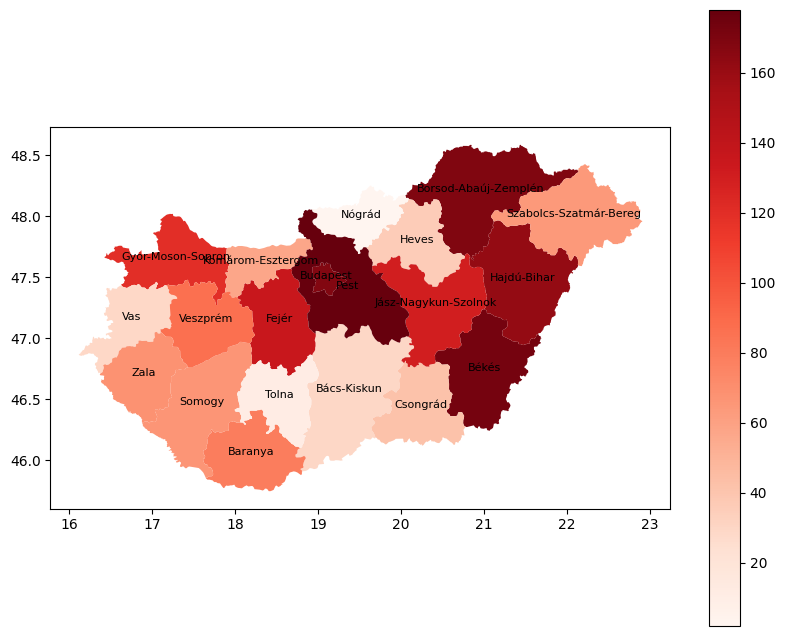

                    NAME_1  cases
13                    Pest    178
2                    Békés    173
3     Borsod-Abaúj-Zemplén    169
4                 Budapest    168
8              Hajdú-Bihar    162
6                    Fejér    136
10    Jász-Nagykun-Szolnok    130
7        Gyor-Moson-Sopron    120
18                Veszprém     87
1                  Baranya     79
19                    Zala     68
14                  Somogy     66
15  Szabolcs-Szatmár-Bereg     64
11       Komárom-Esztergom     57
5                 Csongrád     42
9                    Heves     36
0              Bács-Kiskun     30
17                     Vas     29
16                   Tolna     11
12                  Nógrád      2


In [12]:
import matplotlib.pyplot as plt 
# Crear columna temporal "cases" con los valores de la semana 1
df_geo["cases"] = df_geo["week_1"]

# Graficar y capturar el eje
ax = df_geo.plot(column="cases", cmap="Reds", legend=True, figsize=(10,8))

# Agregar nombres de los distritos
for _, row in df_geo.iterrows():  # _ porque no usamos el índice
    plt.annotate(
        row["NAME_1"], 
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        horizontalalignment='center',
        fontsize=8
    )

# Mostrar el gráfico
plt.show()

# Revisar los primeros registros
print(df_geo[["NAME_1", "cases"]].sort_values(by="cases", ascending=False))


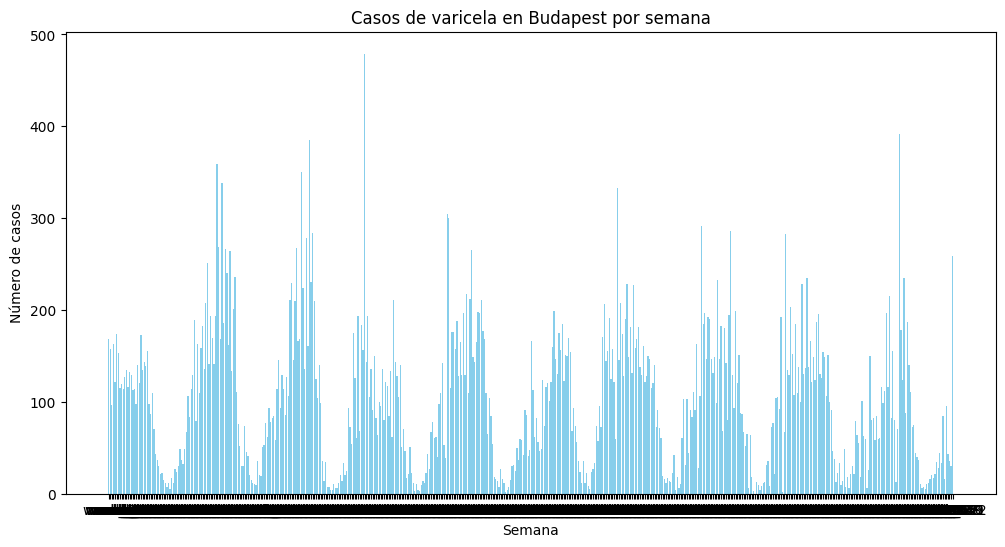

In [13]:
# Filtramos por distrito
fila = dataframe_t.loc['Budapest']

plt.figure(figsize=(12,6))
plt.bar(fila.index, fila.values, color='skyblue')
plt.xlabel("Semana")
plt.ylabel("Número de casos")
plt.title("Casos de varicela en Budapest por semana")
plt.show()

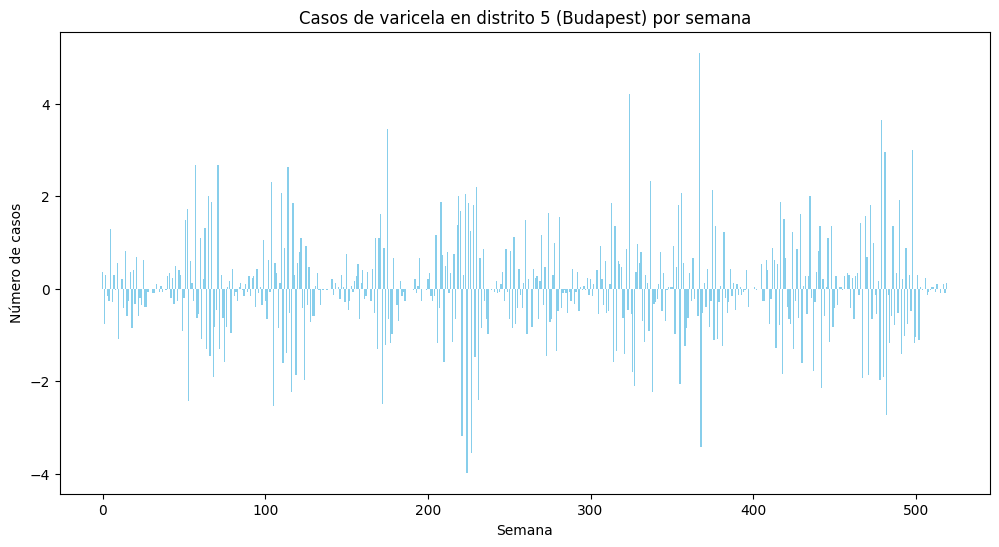

In [14]:
district_idx = 5

# Extraemos los casos de ese distrito a lo largo de las semanas
district_cases = [snapshot.x[district_idx, 0].item() for snapshot in dataset]

# Lo pasamos a DataFrame
df = pd.DataFrame({
    "Semana": range(len(district_cases)),
    "Casos": district_cases
})

# --- Graficamos ---
plt.figure(figsize=(12,6))
plt.bar(df["Semana"], df["Casos"], color="skyblue")
plt.xlabel("Semana")
plt.ylabel("Número de casos")
plt.title("Casos de varicela en distrito 5 (Budapest) por semana")
plt.show()

### Analizamos valores para realizar grafo

In [15]:
print("Número de nodos:", snapshot.num_nodes)
print("Aristas (edge_index):\n", snapshot.edge_index)
print("Número de aristas:", snapshot.edge_index.size(1))


Número de nodos: 20
Aristas (edge_index):
 tensor([[ 0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,
          3,  3,  3,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13,
         13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17,
         17, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19],
        [10,  6, 13,  1,  0,  5, 16,  0, 16,  1, 14, 10,  8,  2,  5,  8, 15, 12,
          9, 10,  3,  4, 13,  0, 10,  2,  5,  0, 16,  6, 14, 13, 11, 18,  7, 17,
         11, 18,  3,  2, 15,  8, 10,  9, 13,  3, 12, 10,  5,  9,  8,  3, 10,  2,
         13,  0,  6, 11,  7, 13, 18,  3,  9, 13, 12, 13,  9,  6,  4, 12,  0, 11,
         10, 18, 19,  1, 14,  6, 16,  3, 15,  8, 16, 14,  1,  0,  6,  7, 19, 17,
         18, 14, 18, 17,  7,  6, 19, 11, 18, 14, 19, 17]])
Número de aristas: 102


In [16]:
edges = snapshot.edge_index.t().tolist()
print("Lista de aristas (nodo_a, nodo_b):", edges)

Lista de aristas (nodo_a, nodo_b): [[0, 10], [0, 6], [0, 13], [0, 1], [0, 0], [0, 5], [0, 16], [1, 0], [1, 16], [1, 1], [1, 14], [2, 10], [2, 8], [2, 2], [2, 5], [3, 8], [3, 15], [3, 12], [3, 9], [3, 10], [3, 3], [4, 4], [4, 13], [5, 0], [5, 10], [5, 2], [5, 5], [6, 0], [6, 16], [6, 6], [6, 14], [6, 13], [6, 11], [6, 18], [7, 7], [7, 17], [7, 11], [7, 18], [8, 3], [8, 2], [8, 15], [8, 8], [8, 10], [9, 9], [9, 13], [9, 3], [9, 12], [9, 10], [10, 5], [10, 9], [10, 8], [10, 3], [10, 10], [10, 2], [10, 13], [10, 0], [11, 6], [11, 11], [11, 7], [11, 13], [11, 18], [12, 3], [12, 9], [12, 13], [12, 12], [13, 13], [13, 9], [13, 6], [13, 4], [13, 12], [13, 0], [13, 11], [13, 10], [14, 18], [14, 19], [14, 1], [14, 14], [14, 6], [14, 16], [15, 3], [15, 15], [15, 8], [16, 16], [16, 14], [16, 1], [16, 0], [16, 6], [17, 7], [17, 19], [17, 17], [17, 18], [18, 14], [18, 18], [18, 17], [18, 7], [18, 6], [18, 19], [18, 11], [19, 18], [19, 14], [19, 19], [19, 17]]


In [17]:
gdf = gdf.to_crs(epsg=3857)

# Ahora calcular centroides
gdf['centroid'] = gdf.geometry.centroid
positions = {i: (point.x, point.y) for i, point in enumerate(gdf['centroid'])}
# Opcional: ver nombres de distritos
print(gdf[['NAME_1', 'centroid']])

                    NAME_1                         centroid
0              Bács-Kiskun  POINT (2156862.769 5871541.914)
1                  Baranya  POINT (2025676.028 5787344.970)
2                    Békés  POINT (2338430.617 5899223.542)
3     Borsod-Abaúj-Zemplén  POINT (2333589.882 6140447.402)
4                 Budapest  POINT (2126534.327 6021800.388)
5                 Csongrád  POINT (2252355.322 5849590.571)
6                    Fejér  POINT (2062960.477 5963684.007)
7        Gyor-Moson-Sopron  POINT (1923688.057 6047655.627)
8              Hajdú-Bihar  POINT (2388823.191 6019818.211)
9                    Heves  POINT (2248202.209 6070690.652)
10    Jász-Nagykun-Szolnok  POINT (2272905.177 5985385.579)
11       Komárom-Esztergom  POINT (2038269.522 6042386.722)
12                  Nógrád  POINT (2172997.604 6104967.146)
13                    Pest  POINT (2154794.193 6009298.527)
14                  Somogy  POINT (1959660.503 5853459.750)
15  Szabolcs-Szatmár-Bereg  POINT (24583

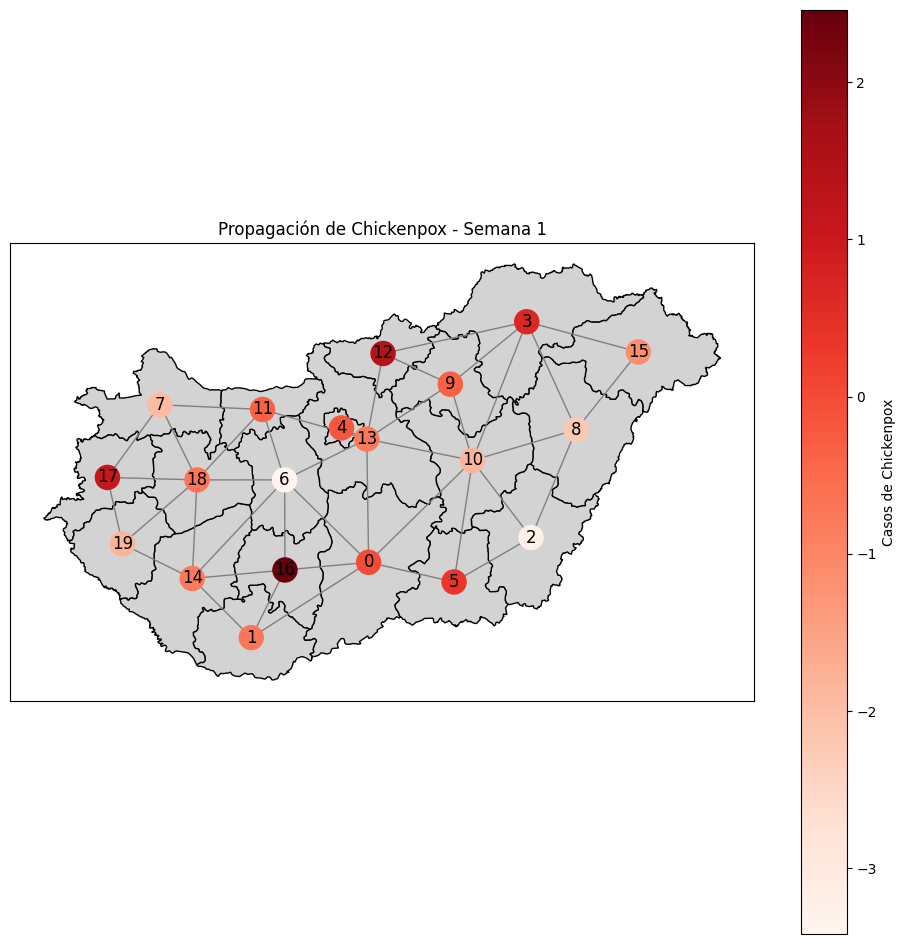

In [18]:
import numpy as np
import networkx as nx
from matplotlib import cm, colors

#Crear grafo
G = nx.Graph()
G.add_nodes_from(range(snapshot.num_nodes))

#Agregar aristas (sin self-loops)
edges_no_self = [(i, j) for i, j in snapshot.edge_index.t().tolist() if i != j]
G.add_edges_from(edges_no_self)

#Extraer casos por nodo (solo la primera columna)
cases = snapshot.x[:, 0]  # número de casos por nodo
if hasattr(cases, "detach"):
    cases = cases.detach().cpu().numpy()
cases = np.array(cases).astype(float)  # asegurar 1D float

#Corregir posiciones para que coincidan con nodos
positions_corrected = {i: positions[i] for i in range(len(cases))}

#Mapear casos a colores
cmap = cm.Reds
norm = colors.Normalize(vmin=cases.min(), vmax=cases.max())
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
node_colors = sm.to_rgba(cases)

#Graficar mapa de fondo
fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, color='lightgray', edgecolor='black')

#Dibujar nodos coloreados según casos
nx.draw_networkx_nodes(
    G,
    pos=positions_corrected,
    node_color=node_colors,
    node_size=300,
    ax=ax
)

#Dibujar aristas
nx.draw_networkx_edges(G, pos=positions_corrected, ax=ax, edge_color='gray')

#Dibujar etiquetas
nx.draw_networkx_labels(G, pos=positions_corrected, ax=ax)

#Agregar barra de color
sm.set_array([])
plt.colorbar(sm, ax=ax, label="Casos de Chickenpox")

plt.title("Propagación de Chickenpox - Semana 1")
plt.show()


## Normalización de los datos

Observamos en esta dataset los **casos** se encuentran ya normalizados, esto lo realiza la misma libreria **PyTorch Geometric Temporal**.

La normalización de los datos la realiza ya el **PyTorch** con una normalización tipo estándar **(z-score)**:

$$
x_{norm}=\frac{x-\mu}{\sigma}
$$
donde:
 * $x$, número reales de casos.
 * $\mu$, media de la serie.
 * $\sigma$, desviación estándar.

In [19]:
# Definimos los valores de la media y desviación estándar
mu = dataframe.values.mean()
std = dataframe.values.std()

print("Media global es: ",mu)
print("Desviación global es: ",std)

# Procedemos normalizar
df_normalized = dataframe_t.apply(lambda row: (row - mu) / std, axis=1)
df_normalized.head(20)

Media global es:  38.84281609195402
Desviación global es:  44.1857441569749


,week_1,week_2,week_3,week_4,week_5,week_6,week_7,week_8,week_9,week_10,...,week_513,week_514,week_515,week_516,week_517,week_518,week_519,week_520,week_521,week_522
district_name,,,,,,,,,,,,,,,,,,,,,
Budapest,2.923051,2.674102,1.293566,2.809892,1.881991,3.058841,2.583575,1.723569,1.814096,1.700937,...,-0.245392,0.116716,-0.132233,1.044617,-0.516973,1.270934,0.094084,-0.086970,-0.200128,4.982539
Baranya,0.908827,0.478824,0.116716,0.229875,0.886195,0.840931,1.451988,0.795668,1.067249,0.954090,...,-0.720658,-0.788553,-0.765922,-0.539604,-0.539604,-0.607499,0.003557,-0.720658,-0.358550,0.071453
Bács-Kiskun,-0.200128,-0.200128,-0.177497,0.094084,0.320402,0.863563,0.343033,0.569351,0.410929,2.040413,...,-0.856449,-0.720658,-0.652763,-0.290655,-0.562236,0.048821,-0.177497,-0.539604,-0.698026,0.229875
Békés,3.036210,1.203039,1.067249,1.972518,1.089881,2.560943,3.466213,3.058841,2.990946,4.032006,...,-0.833817,-0.879080,-0.879080,-0.720658,-0.833817,-0.743290,-0.652763,-0.879080,-0.879080,-0.154865
Borsod-Abaúj-Zemplén,2.945683,3.647266,1.225671,0.161979,1.451988,3.398317,2.470416,2.289362,1.157776,2.900419,...,-0.584868,-0.516973,-0.222760,-0.562236,-0.811185,0.003557,-0.109601,-0.879080,-0.630131,-0.019074
Csongrád,0.071453,0.320402,-0.200128,0.003557,-0.109601,-0.290655,0.591982,0.388297,0.591982,0.569351,...,-0.833817,-0.879080,-0.811185,-0.811185,-0.879080,-0.879080,-0.811185,-0.879080,-0.788553,-0.539604
Fejér,2.198836,0.275138,1.225671,0.297770,1.270934,0.795668,1.384093,1.633042,1.791464,1.225671,...,-0.584868,-0.471709,-0.426446,-0.245392,-0.675395,-0.516973,-0.833817,-0.720658,-0.856449,-0.630131
Gyor-Moson-Sopron,1.836728,0.705141,1.021985,1.700937,2.085677,3.217264,1.791464,3.081473,1.497252,2.606207,...,-0.630131,-0.630131,-0.720658,-0.584868,-0.358550,-0.539604,-0.200128,-0.720658,-0.675395,1.338830
Hajdú-Bihar,2.787261,1.021985,3.443581,1.542515,3.013578,2.674102,2.040413,2.244099,3.511476,1.814096,...,-0.811185,-0.630131,-0.811185,-0.675395,-0.743290,-0.562236,-0.313287,-0.788553,-0.652763,0.501455


In [20]:
dataset = loader.get_dataset(lags=1)  
week = 0
snapshot = dataset[week]
cases = snapshot.x.squeeze().numpy()
districts = [
    "Baranya", "Bekes", "Borsod-Abaúj-Zemplén", "Budapest",
    "Csongrad", "Fejer", "Gyor-Moson-Sopron", "Hajdu-Bihar",
    "Heves", "Komarom-Esztergom", "Nograd", "Pest",
    "Somogy", "Szabolcs-Szatmar-Bereg", "Tolna",
    "Vas", "Veszprem", "Zala", "Jasz-Nagykun-Szolnok", "Bacs-Kiskun"
]
df_week = pd.DataFrame({"Distrito": districts, "Casos_normalizados": cases})

print(df_week)


                  Distrito  Casos_normalizados
0                  Baranya           -0.001081
1                    Bekes           -0.711136
2     Borsod-Abaúj-Zemplén           -3.228085
3                 Budapest            0.647498
4                 Csongrad           -0.173018
5                    Fejer            0.363452
6        Gyor-Moson-Sopron           -3.417408
7              Hajdu-Bihar           -1.964112
8                    Heves           -2.213264
9        Komarom-Esztergom           -0.331407
10                  Nograd           -1.837955
11                    Pest           -0.346686
12                  Somogy            1.421912
13  Szabolcs-Szatmar-Bereg           -0.770439
14                   Tolna           -0.780611
15                     Vas           -1.099346
16                Veszprem            2.458339
17                    Zala            1.094453
18    Jasz-Nagykun-Szolnok           -0.708748
19             Bacs-Kiskun           -1.822808


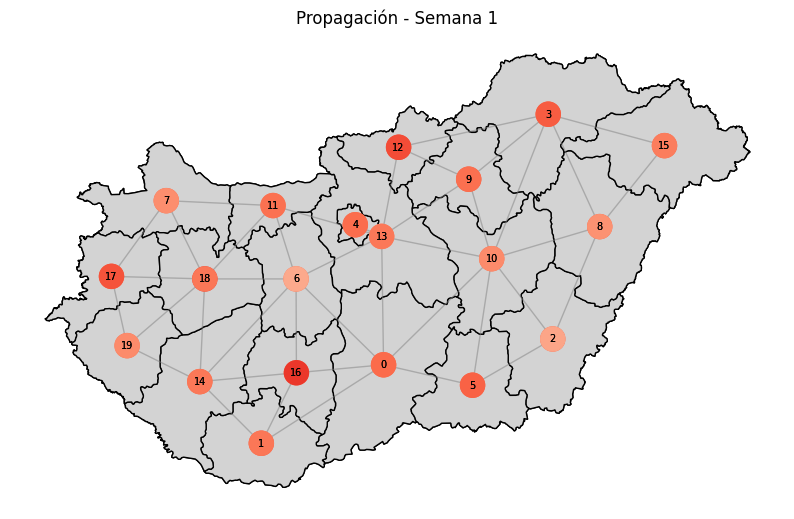

In [21]:
from matplotlib.animation import FuncAnimation
from matplotlib import colormaps

snapshots = list(dataset)
num_weeks = len(snapshots)
num_nodes = snapshots[0].x.shape[0]



# Creamos el grafo
edges = [(i, j) for i, j in snapshot.edge_index.t().tolist() if i != j]
G = nx.Graph()
G.add_nodes_from(range(num_nodes))
G.add_edges_from(edges)

# Configuramos la figura (mapa)
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis("off")
gdf.plot(ax=ax, color="lightgray", edgecolor="black")

cmap = colormaps["Reds"]

# Rango global de casos
all_cases = np.vstack([snap.x[:, 0].numpy() for snap in snapshots])
vmin, vmax = all_cases.min(), all_cases.max()
norm = colors.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)


def init():
    gdf.plot(ax=ax, color="lightgray", edgecolor="black")
    nx.draw_networkx_edges(G, pos=positions, ax=ax, edge_color="gray", alpha=0.5)
    nodes = nx.draw_networkx_nodes(
        G, pos=positions,
        node_color=all_cases[0],
        cmap=cmap, vmin=vmin, vmax=vmax,
        node_size=300, ax=ax
    )
    nx.draw_networkx_labels(G, pos=positions, ax=ax, font_size=7)
    ax.set_title("Propagación - Semana 1")
    return nodes,


def update(frame):
    ax.clear()
    ax.axis("off")
    gdf.plot(ax=ax, color="lightgray", edgecolor="black")
    ax.set_title(f"Propagación - Semana {frame + 1} / {num_weeks}")
    nx.draw_networkx_edges(G, pos=positions, ax=ax, edge_color="gray", alpha=0.5)
    nodes = nx.draw_networkx_nodes(
        G, pos=positions,
        node_color=snapshots[frame].x[:, 0].numpy(),
        cmap=cmap, vmin=vmin, vmax=vmax,
        node_size=300, ax=ax
    )
    nx.draw_networkx_labels(G, pos=positions, ax=ax, font_size=7)
    return nodes,

# Animación del grafo
ani = FuncAnimation(
    fig, update, frames=num_weeks,
    init_func=init, interval=300,
    blit=False, repeat=True
)
ani.save("animacion_grafo.gif", writer="pillow", fps=5)


Respuesta de normalización [GitHub](https://github.com/benedekrozemberczki/pytorch_geometric_temporal/issues/306)